In [1]:
import torch
import numpy as np

In [2]:
# Downloading MNIST
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)


In [3]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
# Vars
num_workers = 0
batch_size = 20
valid_size = 0.2
transform = transforms.ToTensor()

In [5]:
# Getting the training data and testing data
train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=transform)
test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=transform)
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Data Loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          num_workers=num_workers)

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

92.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%
112.7%
/Users/saharshshukla/PycharmProjects/NN_DL_DA1/venv/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You ma

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/2c/j9b406px6x12xww8sbjqxyv00000gp/T/ipykernel_6898/2497275248.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2,20/2, idx+1, xticks=[], yticks=[])


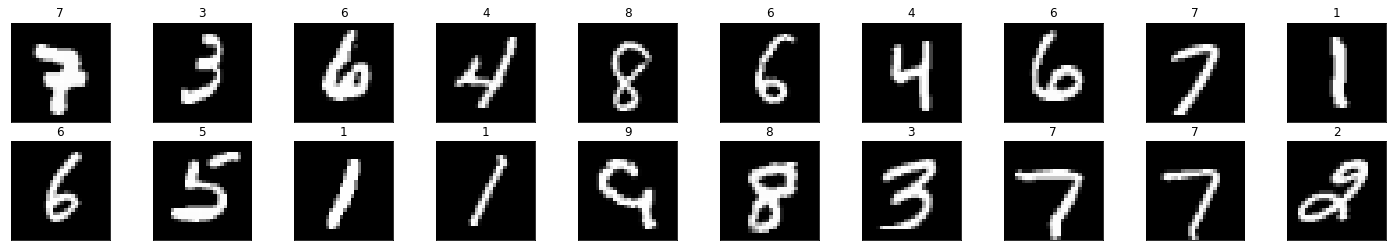

In [9]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_1 = 512
        hidden_2 = 512
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)

        ## INPUT RELU
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [12]:
## Training the model

num_epochs = 50
valid_loss_min = np.Inf

for epoch in range(num_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    model.eval()
    for data,target in valid_loader:
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)

    print(f"Epoch: {epoch+1}\t Training Loss: {train_loss}\t Validation Loss: {valid_loss}")

    # Self Save if Validation loss has decresed

    if valid_loss < valid_loss_min:
        print(f"Saving Model to directory")
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1	 Training Loss: 0.9446044084460785	 Validation Loss: 0.373483088662227
Saving Model to directory
Epoch: 2	 Training Loss: 0.3573254141071811	 Validation Loss: 0.2807242226911088
Saving Model to directory
Epoch: 3	 Training Loss: 0.2838164677059588	 Validation Loss: 0.23682365799012284
Saving Model to directory
Epoch: 4	 Training Loss: 0.23323228167835622	 Validation Loss: 0.19670140042901038
Saving Model to directory
Epoch: 5	 Training Loss: 0.1978403803613037	 Validation Loss: 0.17275115511147304
Saving Model to directory
Epoch: 6	 Training Loss: 0.1702684306696756	 Validation Loss: 0.15344085064716637
Saving Model to directory
Epoch: 7	 Training Loss: 0.15156077621349445	 Validation Loss: 0.1412630172780094
Saving Model to directory
Epoch: 8	 Training Loss: 0.13565971715783234	 Validation Loss: 0.1283234375688092
Saving Model to directory
Epoch: 9	 Training Loss: 0.12105595496133902	 Validation Loss: 0.12098590126338725
Saving Model to directory
Epoch: 10	 Training Loss: 0.1

In [ ]:
model.load_state_dict(torch.load('model.pt'))

In [15]:
# Test the model
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data,target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label]+=1

test_loss = test_loss/len(test_loader.dataset)
print(f"Test Loss: {test_loss}\n")
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.05922838097862314

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 98% (991/1010)
Test Accuracy of     4: 98% (965/982)
Test Accuracy of     5: 97% (873/892)
Test Accuracy of     6: 98% (943/958)
Test Accuracy of     7: 98% (1008/1028)
Test Accuracy of     8: 97% (952/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9824/10000)


/var/folders/2c/j9b406px6x12xww8sbjqxyv00000gp/T/ipykernel_6898/4198272273.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


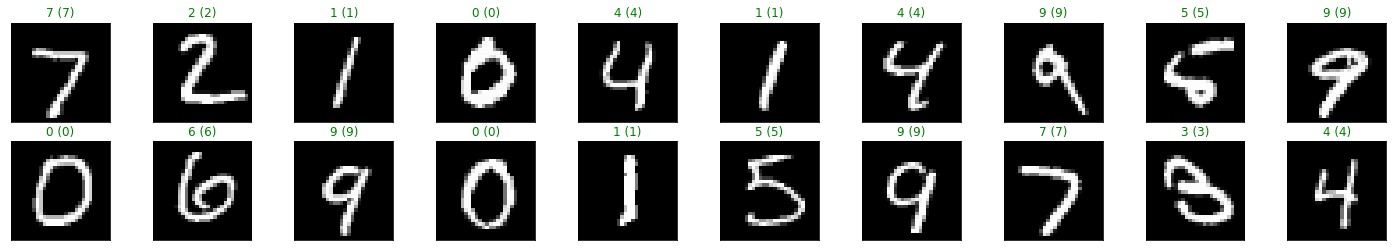

In [16]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))
    #%%
    